In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


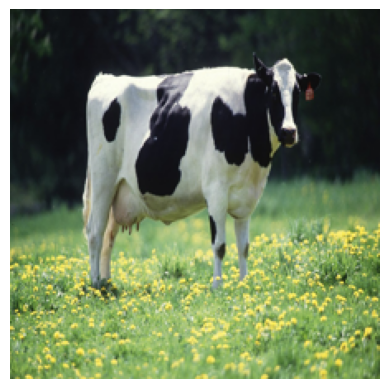

🔍 Label Prediksi: sapi
✅ Nilai Confidence: 0.99


In [ ]:
# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="tflite/model.tflite")
interpreter.allocate_tensors()

# Input/output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
img_size = (224, 224)

# Labels
labels = [
    'anjing',
    'kuda',
    'gajah',
    'kupu-kupu',
    'ayam',
    'kucing',
    'sapi',
    'domba',
    'laba-laba',
    'tupai'
]

# speicify the image path to be predicted
image_path = "images for inference\Cow_female_black_white.jpg"

img = Image.open(image_path).convert('RGB')
img = img.resize(img_size)
input_data = np.expand_dims(img, axis=0).astype(np.float32)
input_data /= 255.0

interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])[0]

predicted_index = np.argmax(output_data)
predicted_label = labels[predicted_index]
confidence = output_data[predicted_index]

# Tampilkan hasil prediksi + gambar
plt.imshow(img)
plt.axis('off')
plt.show()

print(f"🔍 Label Prediksi: {predicted_label}")
print(f"✅ Nilai Confidence: {confidence:.2f}")